## **Project Title: A predictive analysis for the Diabetes-influenced health parameters.**

**Importing necessary liabraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Loading and Displaying the Healthcare Diabetes dataset**

**We load the dataset using Pandas**



In [2]:
file_path ='/content/Healthcare-Diabetes.csv'
df=pd.read_csv("Healthcare-Diabetes.csv") #Reading healthcare dataset
df.head()                         #Displaying the first 5 columns of the dataset available

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


**Viewing the dimensions of our dataset**

In [3]:
df.shape

(2768, 10)

# **Data Cleaning and Preprocessing**

**Viewing the summary of the Heathcare Diabetes Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


**Describing our data statistically**

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


**Checking for duplicates in the dataset**

In [6]:
df.duplicated().sum() #Checking for duplicate values in the dataset

0

**Checking for the sum of null values present in each column**

In [7]:
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Visualizing null values**

<Axes: >

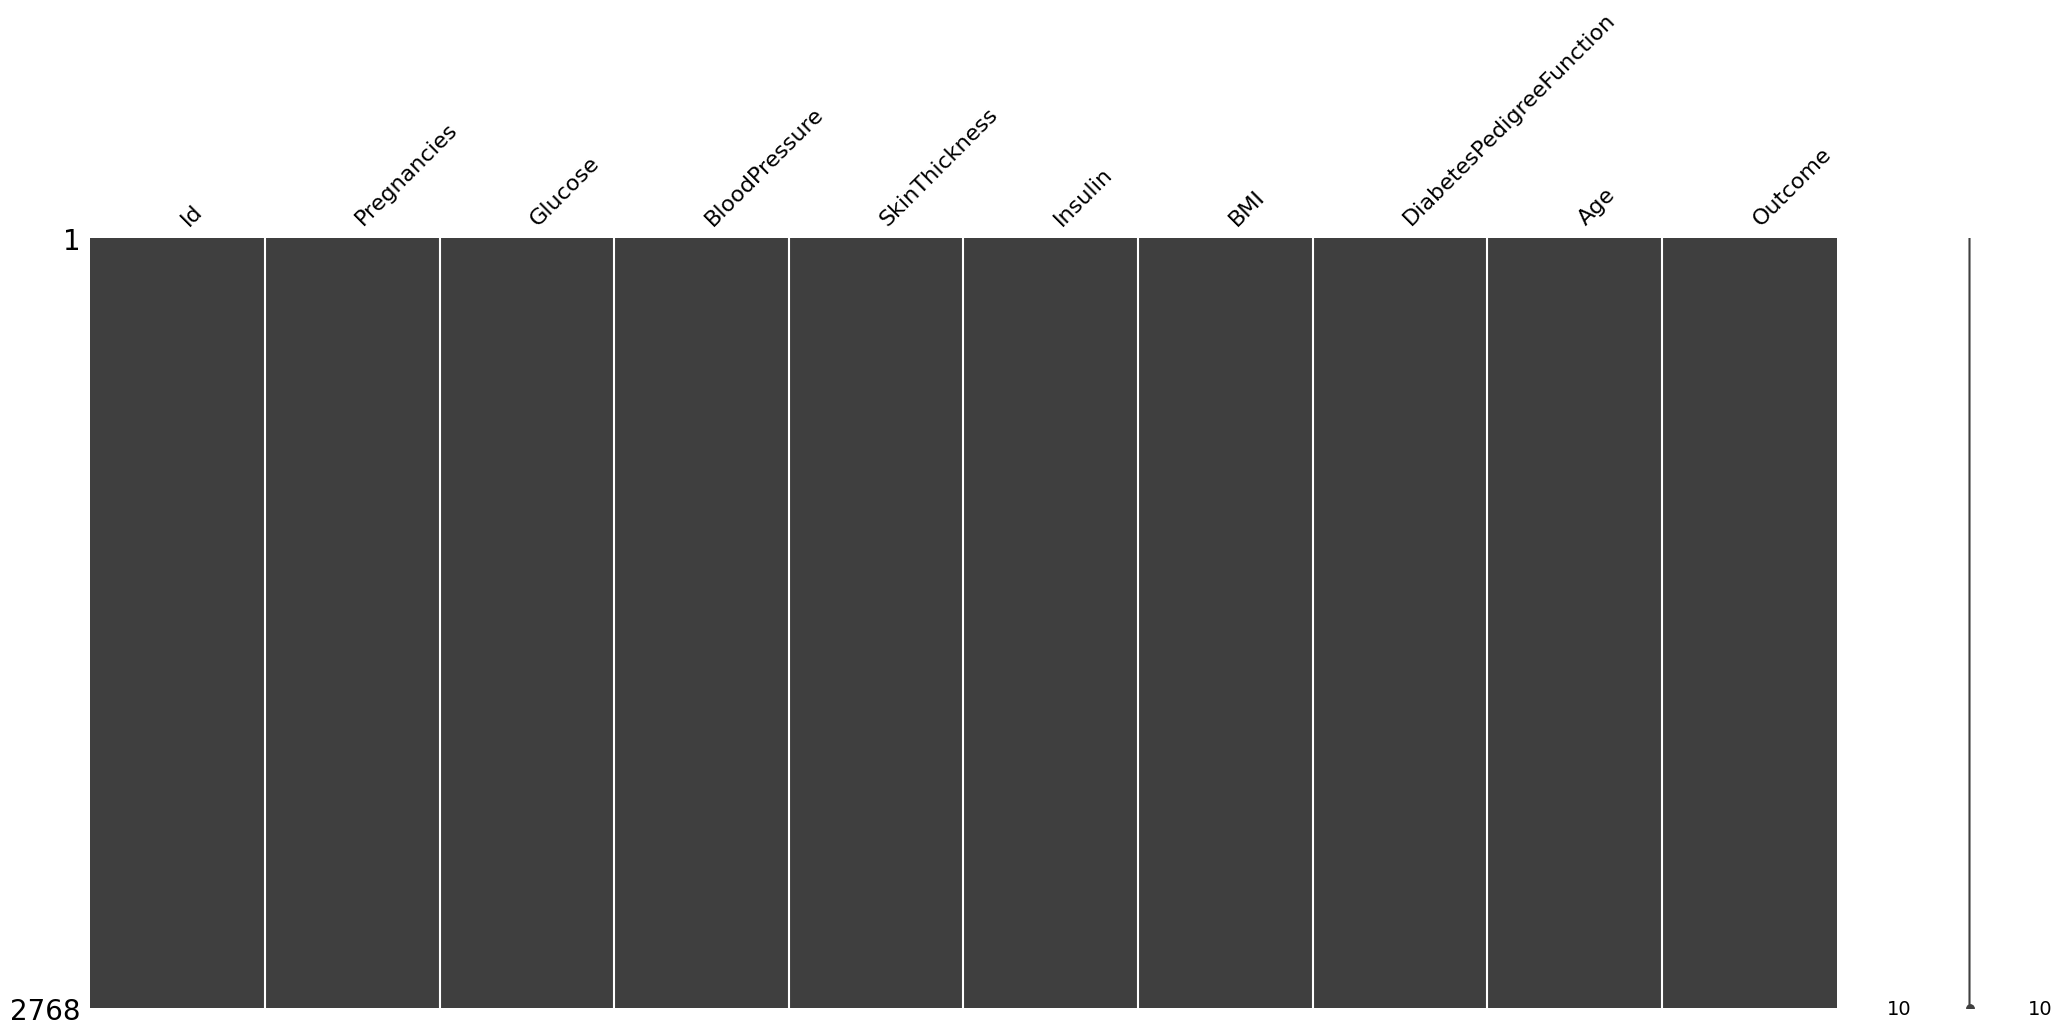

In [8]:
import missingno as msno
msno.matrix(df)


**Handling Missing Data**

In [9]:
df_cleaned=df.dropna() #Removing rows with missing values
df_cleaned

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


**Checking for missing values values**

In [10]:
df_cleaned.head()  # Checking if there are still any missing files from the data that had rows with missing data removed
missing_values = df_cleaned.isnull().sum()  # Checking if there are missing values
print(missing_values)
print(missing_values[missing_values > 0])

# Additional check for no missing values
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Series([], dtype: int64)
There are no missing values in the dataset.


**Describing our data statistically**

In [11]:
df_cleaned[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


**Removal of the ID column**

* The ID clumn has been removed in order to reduce noise as the model may end up treating it like a feature when it is not which might lead to overfitting if its not removed.
* It is a unique identifier and does not contain any meaningful or predictive information when it comes to our target variable 'Outcome'



In [12]:
# Removing rows with missing values and dropping the 'Id' column
df_cleaned = df.dropna().drop(columns=['Id'])

# Display the cleaned DataFrame
df_cleaned


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


**Feature Engineering**

In [13]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Healthcare-Diabetes.csv'
df = pd.read_csv(file_path)

# Remove 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# 1. Creating new feature: Age Group
age_bins = [0, 30, 50, np.inf]
age_labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 2. Creating new feature: BMI Category
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Display the updated DataFrame
print(df[['Age', 'Age_Group', 'BMI', 'BMI_Category']].head())

# Save the dataset with the new features
df.to_csv('/content/Age_BMI_Feature_Engineered_Healthcare_Diabetes.csv', index=False)


   Age    Age_Group   BMI BMI_Category
0   50  Middle-aged  33.6        Obese
1   31  Middle-aged  26.6   Overweight
2   32  Middle-aged  23.3       Normal
3   21        Young  28.1   Overweight
4   33  Middle-aged  43.1        Obese


# **Exploratory Data Analysis-EDA**

**Bivariate and Univariate Visualization**

**Histogram**

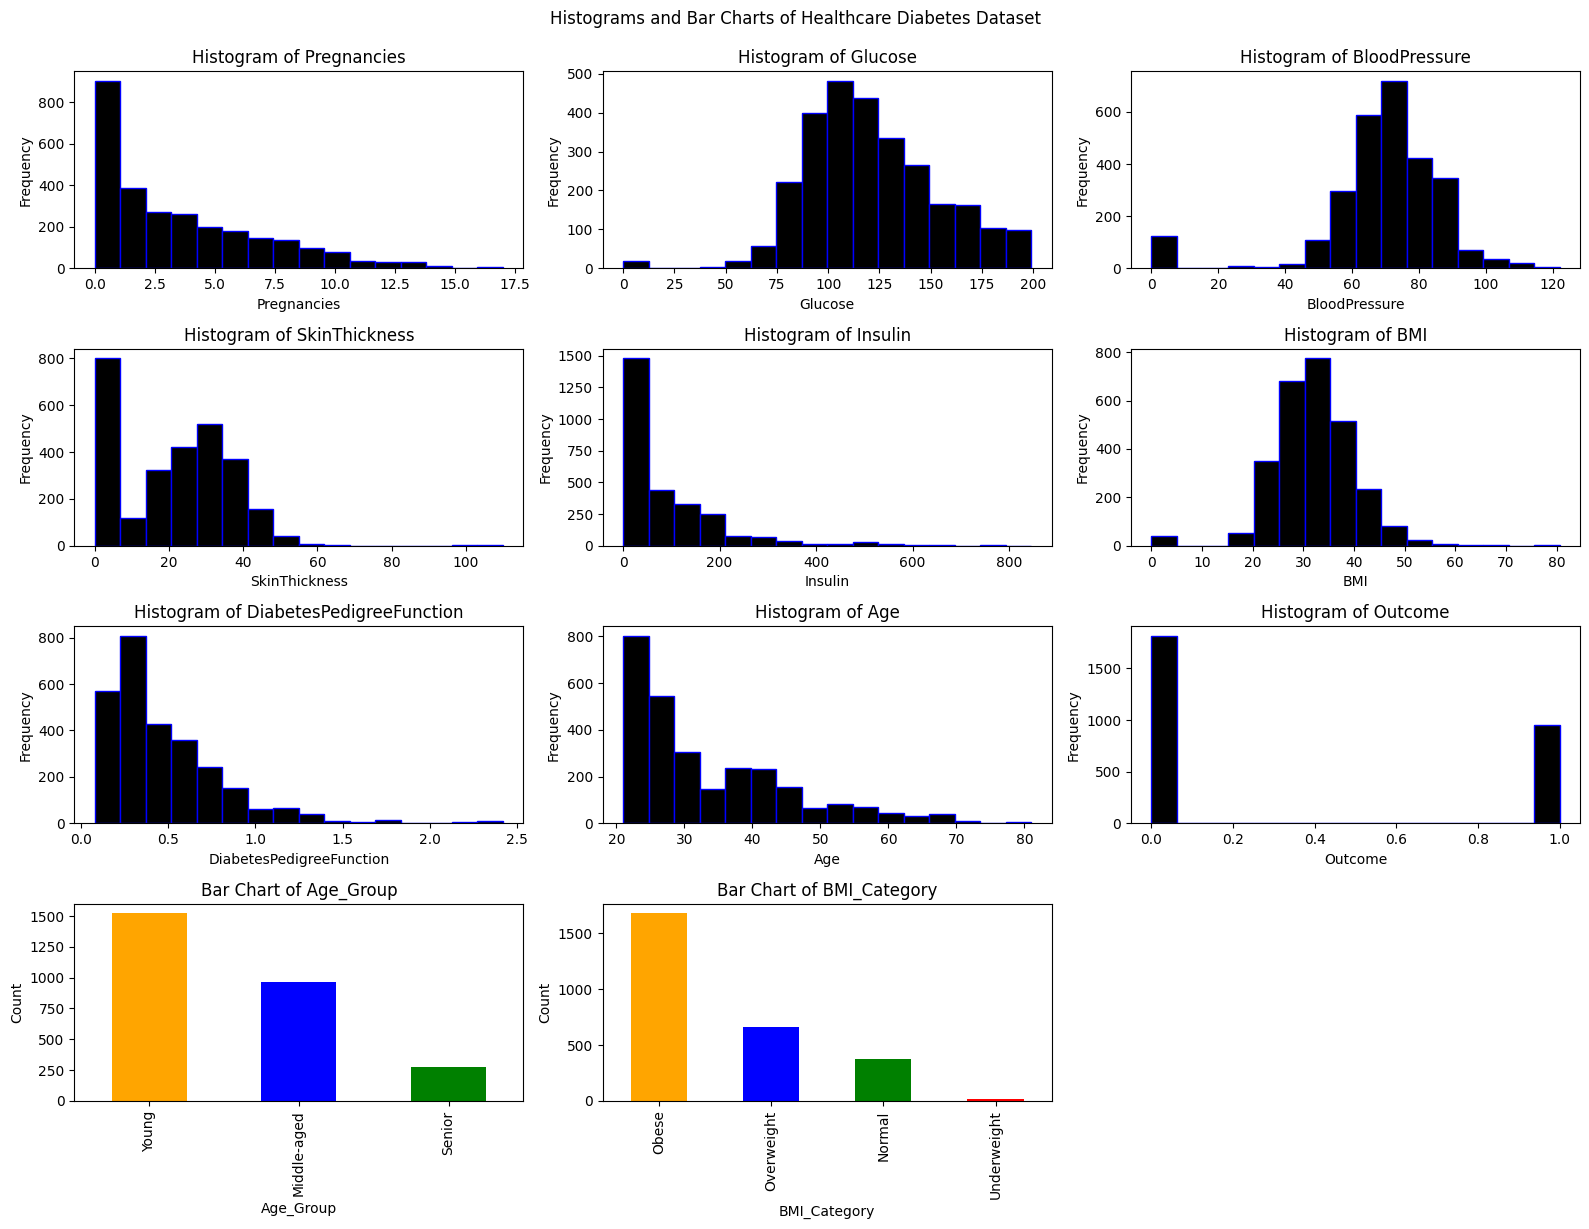

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Age_BMI_Feature_Engineered_Healthcare_Diabetes.csv'
df_cleaned = pd.read_csv(file_path, delimiter=',')

# Plot histograms for numerical features
plt.figure(figsize=(16, 12))
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for i, column in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(df_cleaned[column], bins=16, color='black', edgecolor='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Plot bar charts for categorical features (Age_Group and BMI_Category)
categorical_columns = ['Age_Group', 'BMI_Category']
for i, column in enumerate(categorical_columns, len(numerical_columns) + 1):
    plt.subplot(4, 3, i)
    df_cleaned[column].value_counts().plot(kind='bar', color=['orange', 'blue', 'green', 'red'])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Histograms and Bar Charts of Healthcare Diabetes Dataset', y=1.02)
plt.show()


**Calculating the proportion of Diabetes in each Age Group and BMI**

In [15]:
# Create Age_Group column
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Define bins and labels for BMI groups
bins_bmi = [0, 18.5, 25, 30, float('inf')]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create BMI_Group column
df_cleaned['BMI_Group'] = pd.cut(df_cleaned['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)


In [16]:
# Proportion of diabetics in each age group
age_group_diabetes_proportions = df_cleaned[df_cleaned['Outcome'] == 1]['Age_Group'].value_counts() / df_cleaned['Age_Group'].value_counts()
print("Proportion of diabetics in each Age Group:")
print(age_group_diabetes_proportions)

# Proportion of diabetics in each BMI group
bmi_group_diabetes_proportions = df_cleaned[df_cleaned['Outcome'] == 1]['BMI_Group'].value_counts() / df_cleaned['BMI_Group'].value_counts()
print("\nProportion of diabetics in each BMI Group:")
print(bmi_group_diabetes_proportions)


Proportion of diabetics in each Age Group:
Age_Group
Young          0.207469
Middle-aged    0.501475
Senior         0.465574
Name: count, dtype: float64

Proportion of diabetics in each BMI Group:
BMI_Group
Obese          0.454225
Overweight     0.226300
Normal         0.070028
Underweight    0.094340
Name: count, dtype: float64


**Violin Plot for each feature**


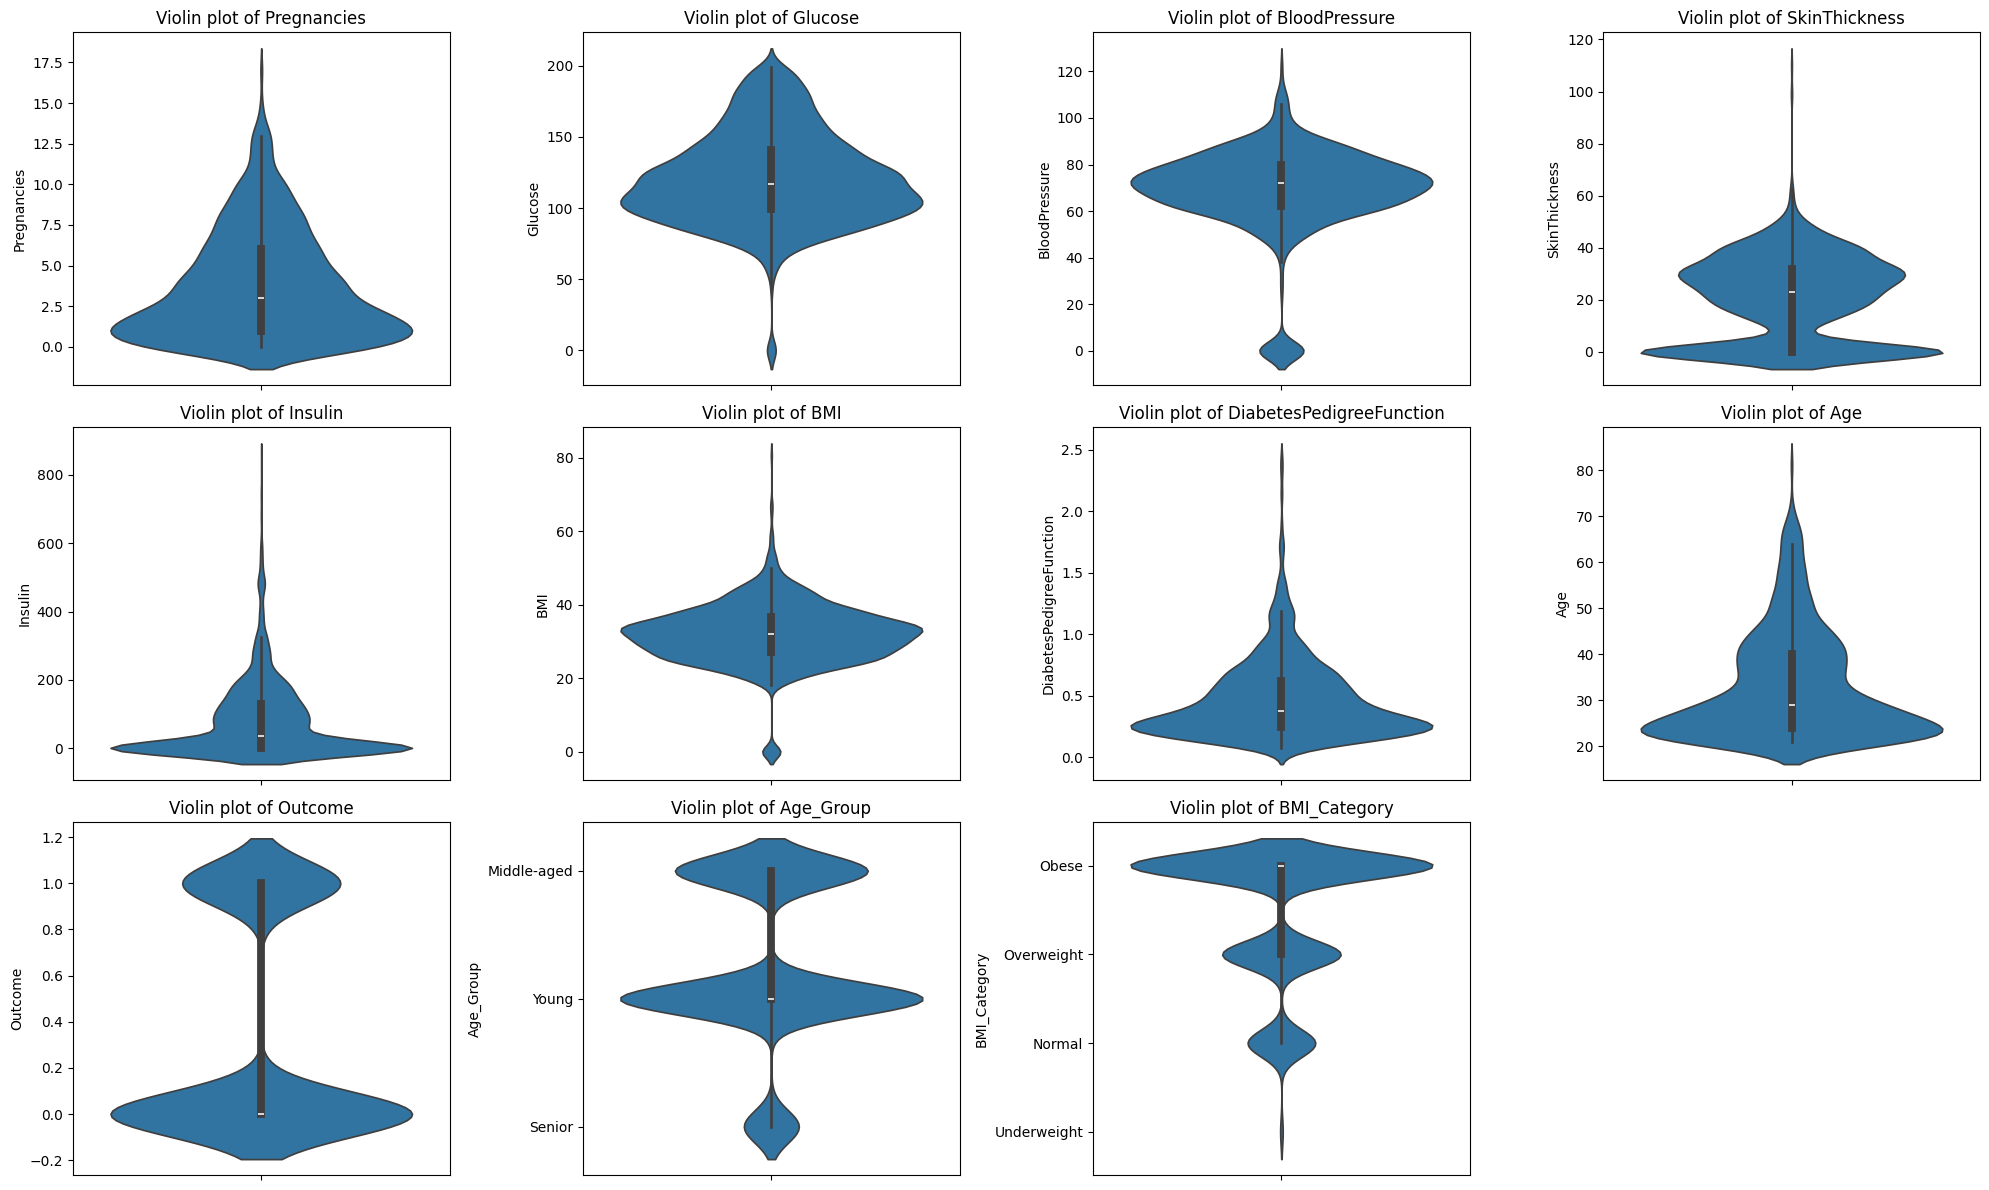

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/Age_BMI_Feature_Engineered_Healthcare_Diabetes.csv'
df_cleaned = pd.read_csv(file_path, delimiter=',')

# df_cleaned is the DataFrame
plt.figure(figsize=(20, 12))  # Adjust size as needed

# Loop over all columns and create a violin plot for each
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(len(df_cleaned.columns)//4 + 1, 4, i)  # Create subplots in a grid layout
    sns.violinplot(y=df_cleaned[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()


**Box Plot of Different Healthcare Diabetes Dataset features**

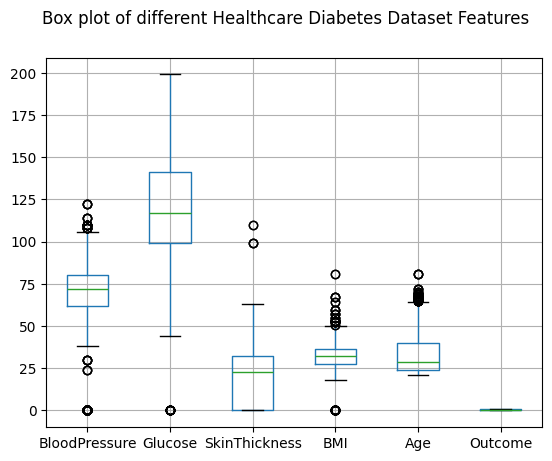

In [18]:
import matplotlib.pyplot as plt # importing libraries
df_cleaned[["BloodPressure","Glucose","SkinThickness","BMI","Age", "Outcome"]].boxplot()
plt.suptitle('Box plot of different Healthcare Diabetes Dataset Features')

# Show the plot
plt.show()

**Visualization of Target Variable 'Outcome'**

Outcome is a binary feature which shows if an individual has had diabetes or not.

Samples of Healthy people: 1816
Samples of Diabetic people: 952


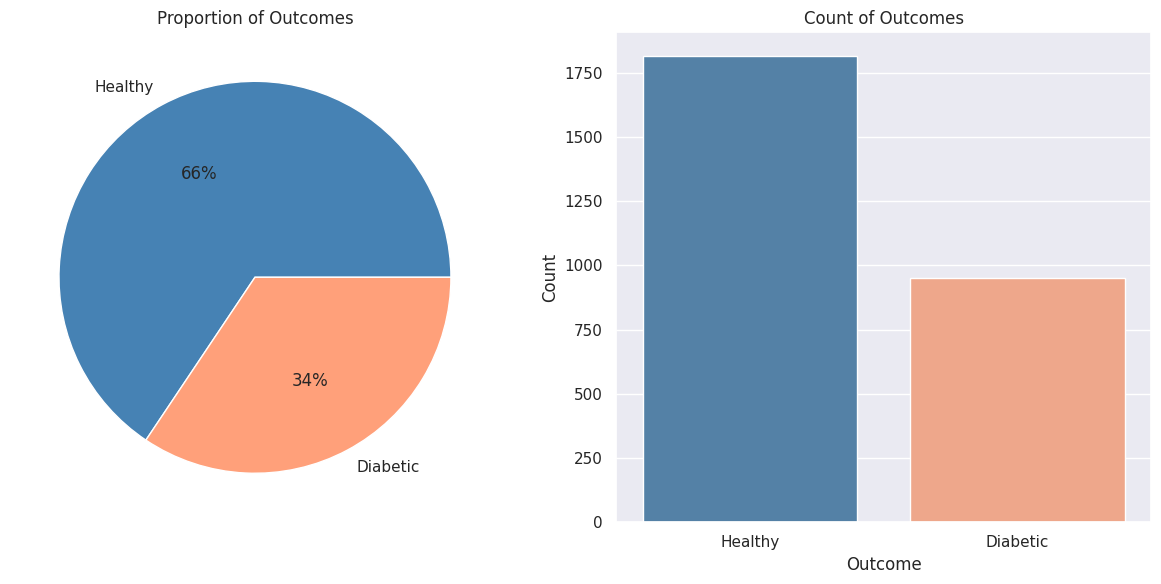

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Setting the style for the plots
style.use('ggplot')
sns.set_theme(style="darkgrid")

# Setting up the figure and subplots with adjusted layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Reducing the figure size to fit on one page

# 1. Pie Chart
labels = ["Healthy", "Diabetic"]
df_cleaned['Outcome'].value_counts().plot(
    kind='pie',
    labels=labels,
    colors=["#4682B4", "#FFA07A"],  # Use the same blue and orange shades
    autopct='%1.0f%%',
    ax=axes[0],  # Specify the first subplot
    labeldistance=1.1
)
axes[0].set_title("Proportion of Outcomes")  # Title for pie chart
axes[0].set_ylabel("")  # Removing default ylabel from pie chart

# 2. Count Plot
sns.countplot(
    x='Outcome',
    hue='Outcome',
    data=df_cleaned,
    palette=["#4682B4", "#FFA07A"],  # Use the same blue and orange shades
    dodge=False,
    ax=axes[1]  # Specify the second subplot
)
# Customizing the count plot
axes[1].legend_.remove()  # Remove the unnecessary legend
axes[1].set_xticks([0, 1])  # Specify tick positions
axes[1].set_xticklabels(["Healthy", "Diabetic"])  # Assign labels to ticks
axes[1].set_title("Count of Outcomes")  # Title for count plot
axes[1].set_xlabel("Outcome")  # Label for x-axis
axes[1].set_ylabel("Count")  # Label for y-axis

# Calculate the counts and print them
healthy, diabetes = df_cleaned['Outcome'].value_counts().values
print("Samples of Healthy people:", healthy)
print("Samples of Diabetic people:", diabetes)

# Adjust layout to prevent overlap and fit neatly
plt.tight_layout()
plt.show()


**A graph showing a count plot for the 'Outcome' variable,  Healthy individuals(Outcome = 0) and diabetic individuals(Outcome = 1)**

**Distribution of other features with respect to(w.r.t) 'Outcome'**



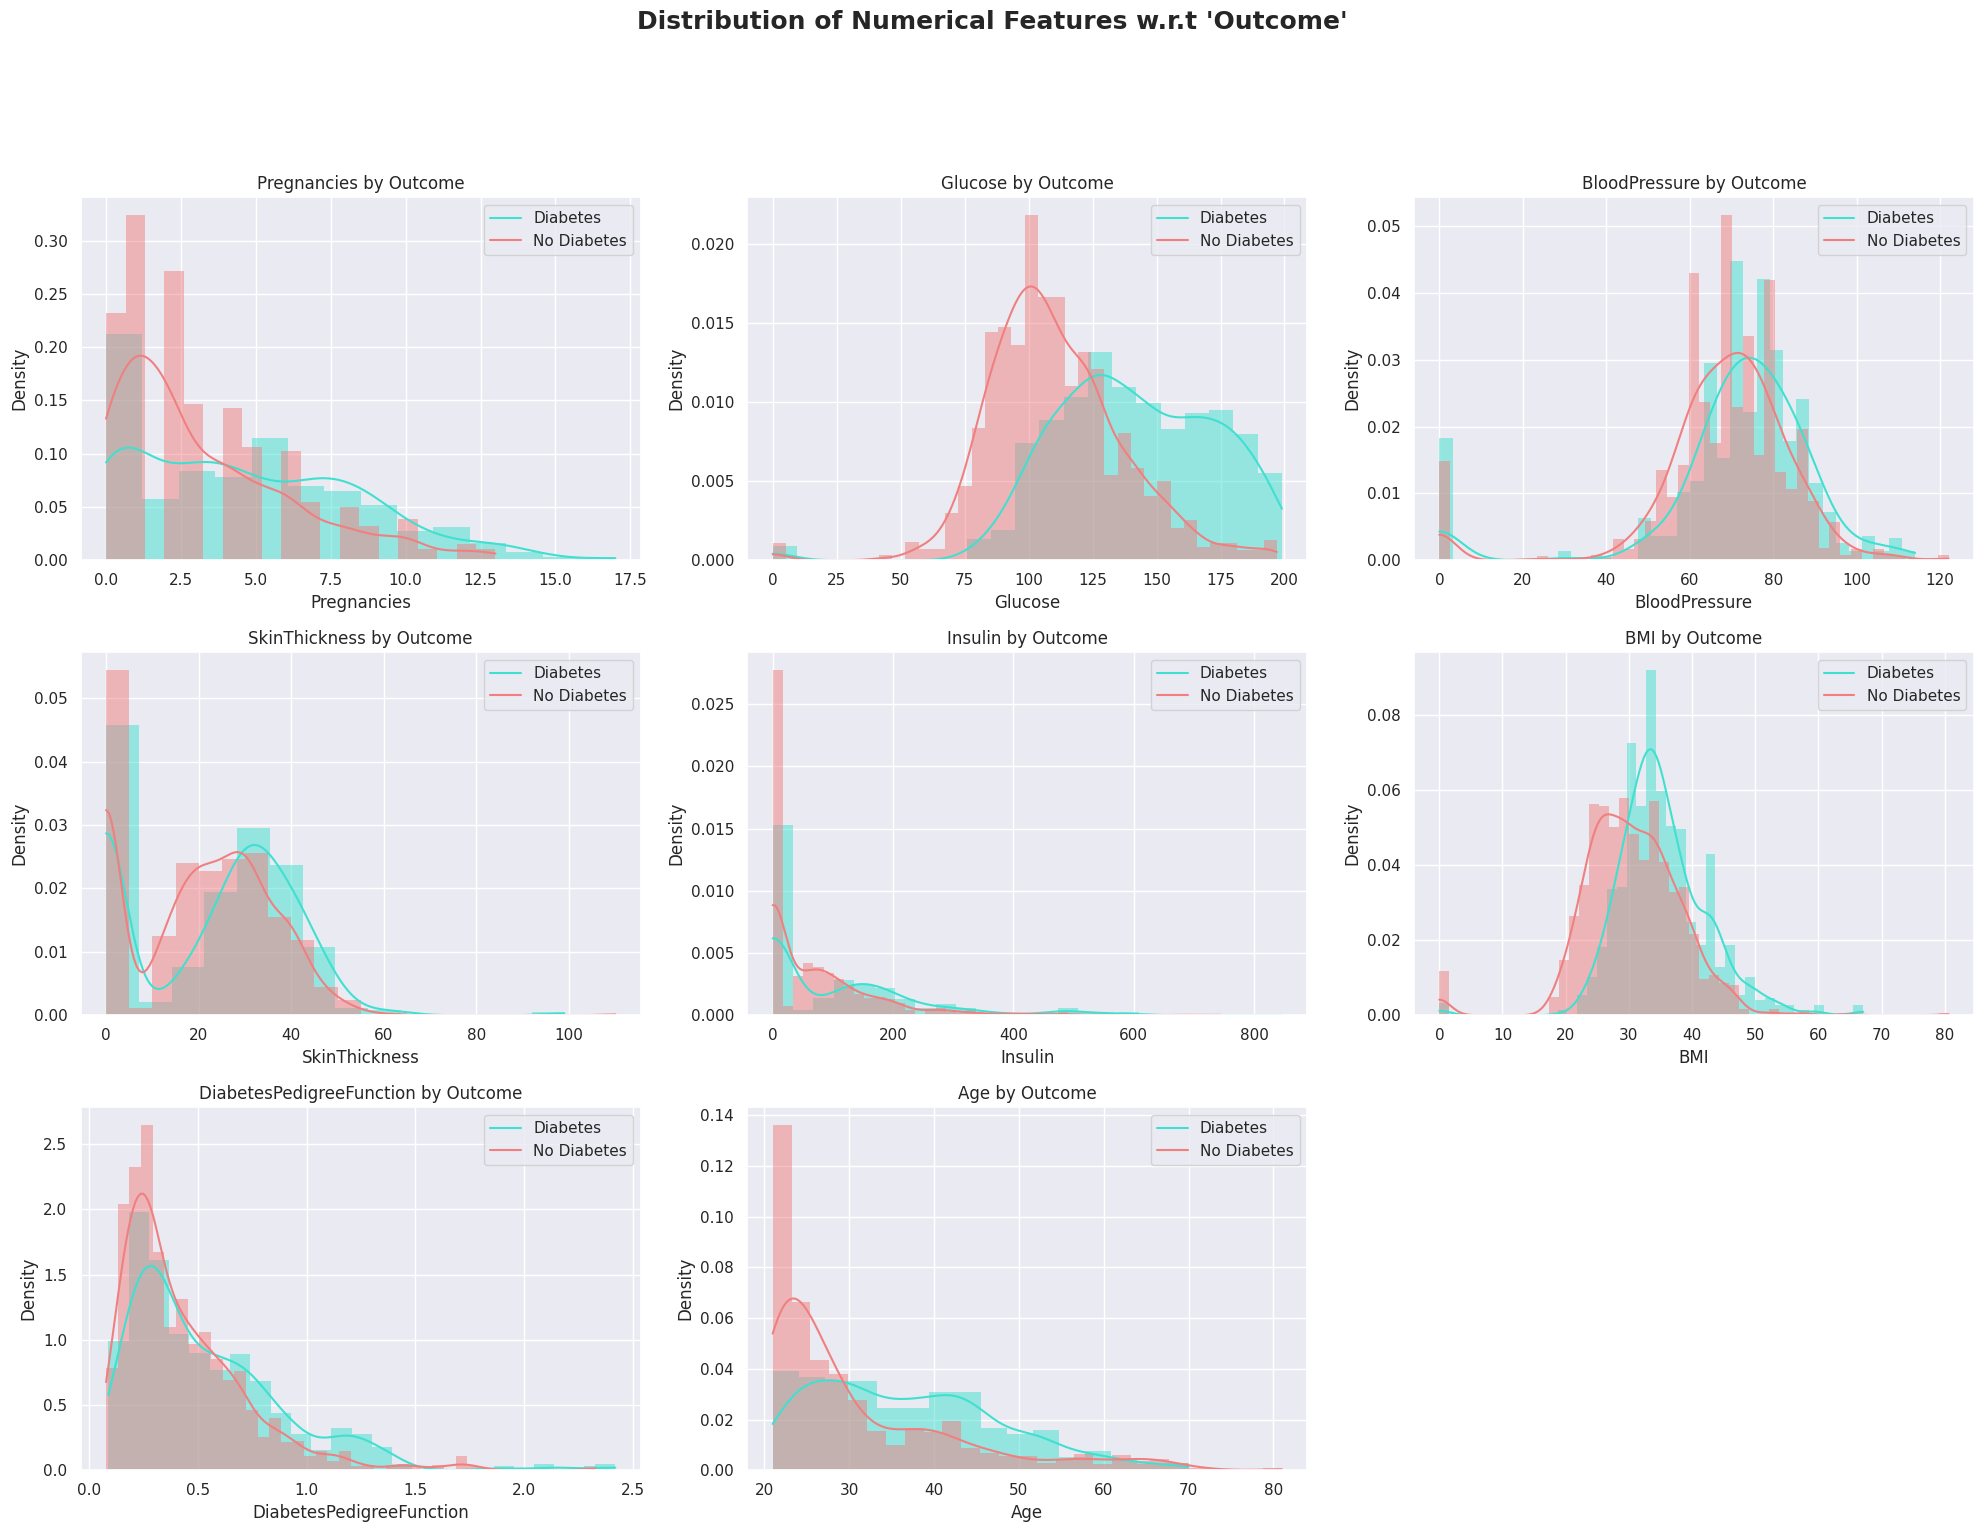

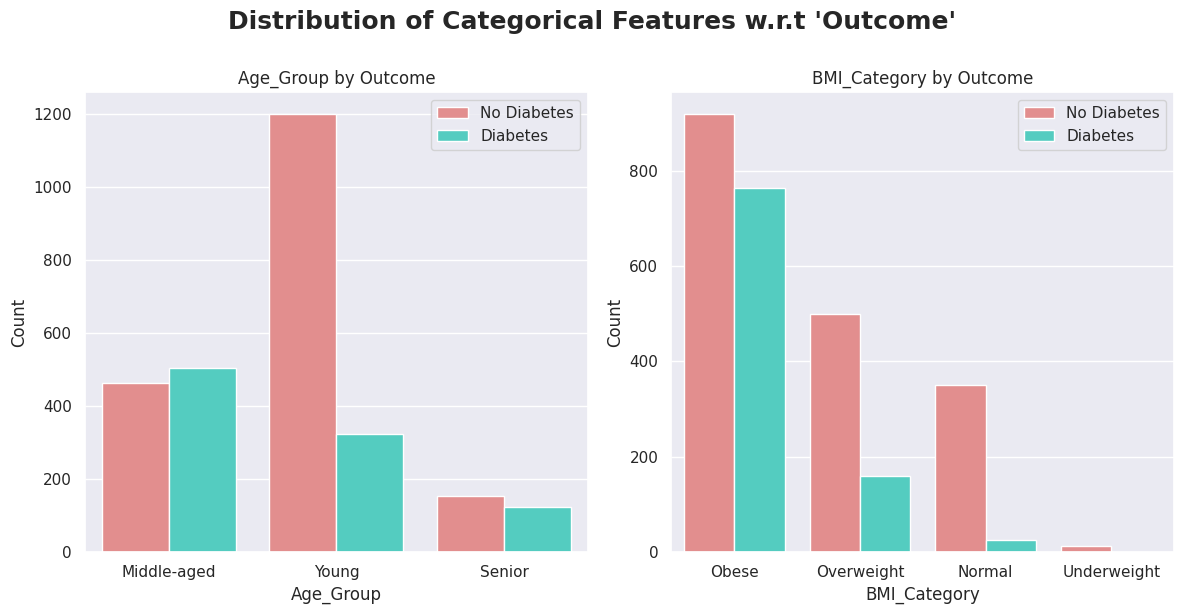

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Id' and 'Outcome' columns for numerical features
numerical_features = [col for col in df_cleaned.columns if col not in ['Id', 'Outcome', 'Age_Group', 'BMI_Category']]

# Include 'Age_Group' and 'BMI_Category' as categorical features
categorical_features = ['Age_Group', 'BMI_Category']

# Set up the grid for subplots for numerical features
n_numerical = len(numerical_features)
n_cols = 3  # Number of columns per row
n_rows = (n_numerical + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, n_rows * 5))  # Adjust the figure size based on the number of rows

# Add a main title for numerical features
plt.suptitle("Distribution of Numerical Features w.r.t 'Outcome'", fontsize=18, fontweight='bold', y=1.02)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each feature

    # Plot histograms for both outcomes
    sns.histplot(df_cleaned[feature][df_cleaned['Outcome'] == 1], color="turquoise", kde=True, stat="density", linewidth=0)
    sns.histplot(df_cleaned[feature][df_cleaned['Outcome'] == 0], color="lightcoral", kde=True, stat="density", linewidth=0)

    # Add a title and legend
    plt.title(f'{feature} by Outcome')  # Title for each feature
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Density')  # Y-axis label
    plt.legend(['Diabetes', 'No Diabetes'])

# Adjust layout for numerical features
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing for the main title
plt.show()

# Plotting bar charts for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)  # Create a subplot for each categorical feature
    sns.countplot(data=df_cleaned, x=feature, hue='Outcome', palette=['lightcoral', 'turquoise'])
    plt.title(f'{feature} by Outcome')  # Title for each feature
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Count')  # Y-axis label
    plt.legend(['No Diabetes', 'Diabetes'])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing for the main title
plt.suptitle("Distribution of Categorical Features w.r.t 'Outcome'", fontsize=18, fontweight='bold', y=1.02)
plt.show()


**A pairplot showing the relationship of between the features in the dataset**

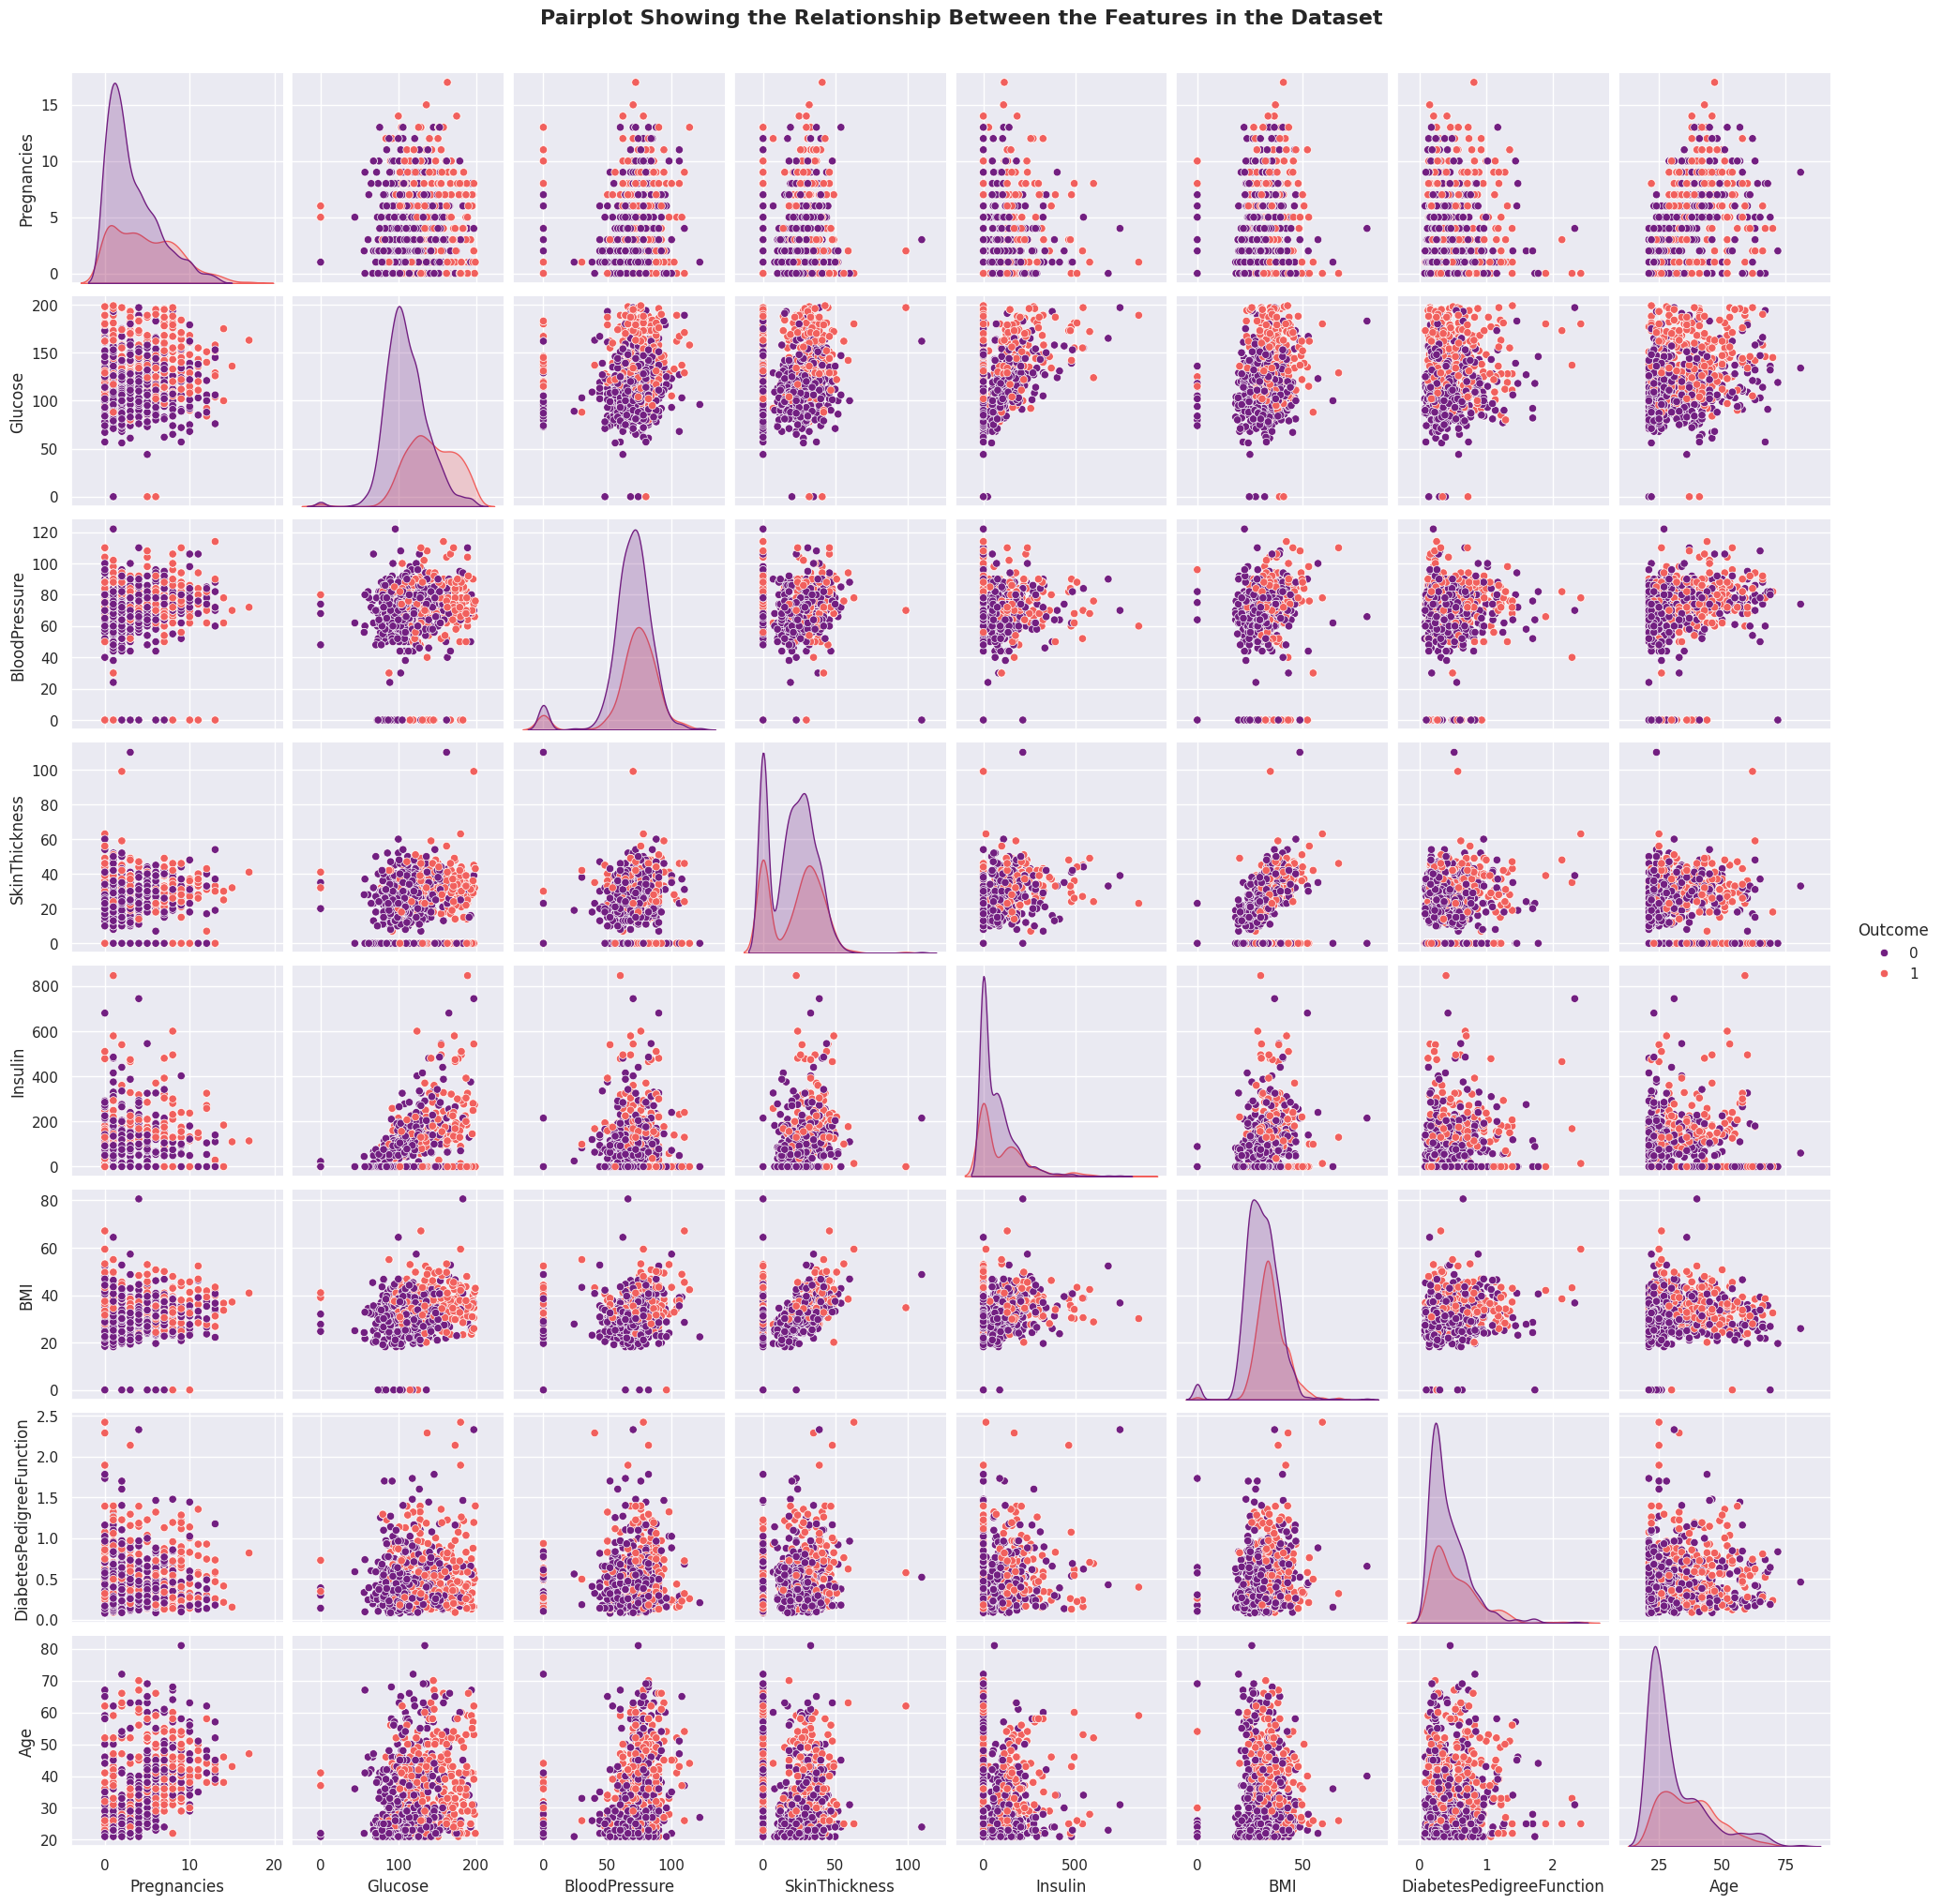

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/Healthcare-Diabetes.csv'
df_cleaned = pd.read_csv(file_path, delimiter=',')
df_cleaned = df_cleaned.drop(columns=['Id'])

# Creating the pairplot
pairplot = sns.pairplot(df_cleaned, hue='Outcome', palette='magma')

# Adding the heading
pairplot.fig.suptitle("Pairplot Showing the Relationship Between the Features in the Dataset",
                      fontsize=16, fontweight='bold', y=1.02)

# Showing the plot
plt.show()


**Finding the Correlation between the columns**

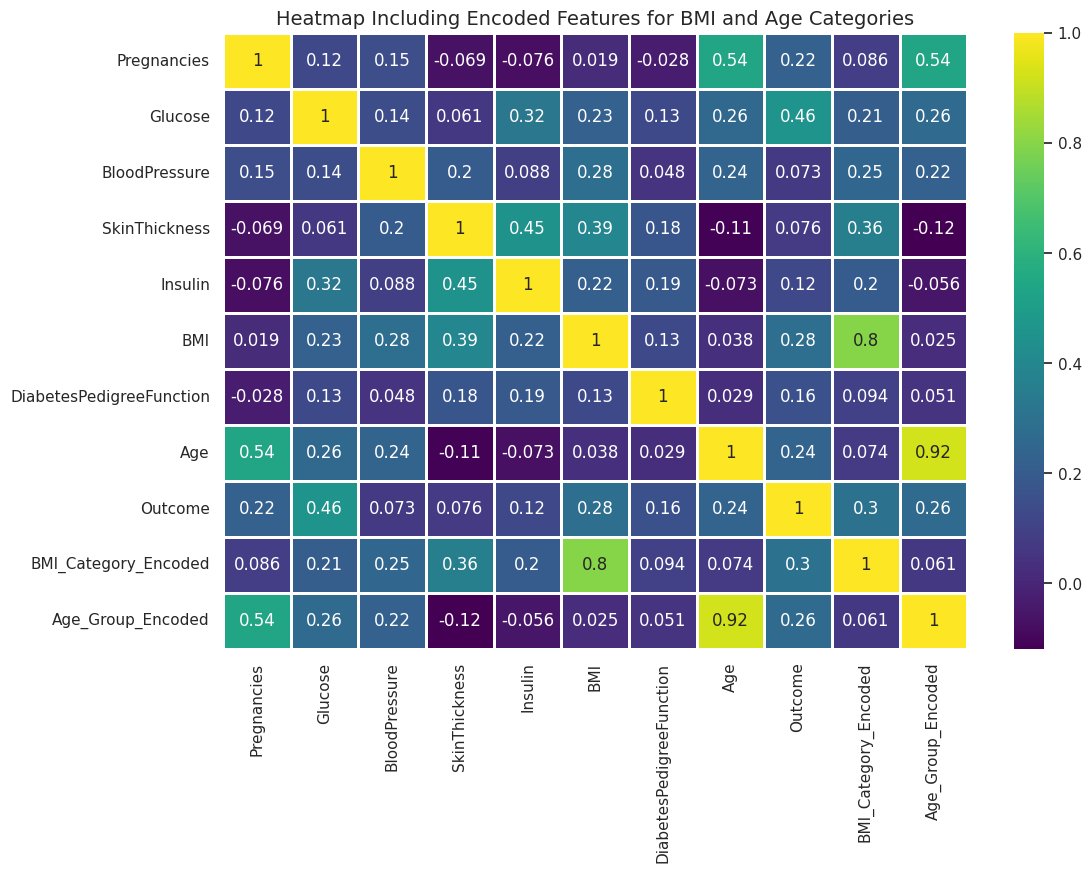

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Healthcare-Diabetes.csv'
df_cleaned = pd.read_csv(file_path, delimiter=',')
df_cleaned = df_cleaned.drop(columns=['Id'])

# Adding new features for BMI and Age
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

def categorize_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df_cleaned['BMI_Category'] = df_cleaned['BMI'].apply(categorize_bmi)
df_cleaned['Age_Group'] = df_cleaned['Age'].apply(categorize_age)

# Encode the new features for heatmap visualization
df_cleaned['BMI_Category_Encoded'] = df_cleaned['BMI_Category'].map({
    'Underweight': 1,
    'Normal weight': 2,
    'Overweight': 3,
    'Obese': 4
})

df_cleaned['Age_Group_Encoded'] = df_cleaned['Age_Group'].map({
    'Young': 1,
    'Middle-aged': 2,
    'Senior': 3
})

# Heatmap including the encoded new features
plt.figure(figsize=(12, 8))
plt.title('Heatmap Including Encoded Features for BMI and Age Categories', fontsize=14)
correlation_matrix = df_cleaned.drop(columns=['BMI_Category', 'Age_Group']).corr()  # Exclude original categorical columns
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.8)

# Show the plot
plt.show()


**Correlation Of each feature with 'Outcome'**

In [23]:
# Select only numeric columns for correlation
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation of all features with Outcome
correlation = numeric_features.corr()

# Extract the correlation values for Outcome
outcome_correlation = correlation['Outcome'].sort_values(ascending=False)

# Display each feature's correlation with Outcome as text
print("Correlation of each feature with Outcome (sorted by strength):")
for feature, value in outcome_correlation.items():
    if feature != 'Outcome':  # Skip 'Outcome' itself
        print(f"- {feature}: {value:.2f}")


Correlation of each feature with Outcome (sorted by strength):
- Glucose: 0.46
- BMI_Category_Encoded: 0.30
- BMI: 0.28
- Age_Group_Encoded: 0.26
- Age: 0.24
- Pregnancies: 0.22
- DiabetesPedigreeFunction: 0.16
- Insulin: 0.12
- SkinThickness: 0.08
- BloodPressure: 0.07


**Checking for values which are zeros**

In [24]:
print("Total number of rows in the dataset:",len(df))
print ("Total number of rows in the BloodPressure which are zero:",
       len(df.loc[df['BloodPressure'] == 0]))
print ("Total number of rows in the Glucose which are zero:",
       len(df.loc[df['Glucose'] == 0]))
print ("Total number of rows in the Pregnancies which are zero:",
       len(df.loc[df['Pregnancies'] == 0]))
print ("Total number of rows in the SkinThickness which are zero:",
       len(df.loc[df['SkinThickness'] == 0]))
print ("Total number of rows in the Insulin which are zero:",
       len(df.loc[df['Insulin'] == 0]))
print ("Total number of rows in the DiabetesPedigreeFunction which are zero:",
       len(df.loc[df['DiabetesPedigreeFunction'] == 0]))


Total number of rows in the dataset: 2768
Total number of rows in the BloodPressure which are zero: 125
Total number of rows in the Glucose which are zero: 18
Total number of rows in the Pregnancies which are zero: 412
Total number of rows in the SkinThickness which are zero: 800
Total number of rows in the Insulin which are zero: 1330
Total number of rows in the DiabetesPedigreeFunction which are zero: 0


**Handling the values which are zero**

* Replacing zeros using median


In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer for numerical columns to replace zeros with the median
imputer = SimpleImputer(missing_values=0, strategy='median')

# List of columns to handle (numerical features)
numerical_columns = ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

# Apply imputer to each column
for column in numerical_columns:
    # Reshape the column to be 2D (as SimpleImputer expects 2D arrays)
    df_cleaned[column] = imputer.fit_transform(df_cleaned[column].values.reshape(-1, 1))

# For 'Pregnancies' handle zeros as well using the mode (most frequent value):
imputer_pregnancies = SimpleImputer(missing_values=0, strategy='most_frequent')
df_cleaned['Pregnancies'] = imputer_pregnancies.fit_transform(df_cleaned['Pregnancies'].values.reshape(-1, 1))


**Checking if they are the zeros are handled correctly**

In [ ]:
# Verify that zeros are handled
print("Number of zeros in BloodPressure:", (df_cleaned['BloodPressure'] == 0).sum())
print("Number of zeros in Glucose:", (df_cleaned['Glucose'] == 0).sum())
print("Number of zeros in Pregnancies:", (df_cleaned['Pregnancies'] == 0).sum())
print("Number of zeros in SkinThickness:", (df_cleaned['SkinThickness'] == 0).sum())
print("Number of zeros in Insulin:", (df_cleaned['Insulin'] == 0).sum())
print("Number of zeros in DiabetesPedigreeFunction:", (df_cleaned['DiabetesPedigreeFunction'] == 0).sum())


Number of zeros in BloodPressure: 0
Number of zeros in Glucose: 0
Number of zeros in Pregnancies: 0
Number of zeros in SkinThickness: 0
Number of zeros in Insulin: 0
Number of zeros in DiabetesPedigreeFunction: 0


**Splitting the data into training and testing data**

* On this step we split our data into
training and testing of set using the split function from the sklearn library.
* The X variable will be assigned to all the column features in the dataset except the last one which is the 'Outcome'.
* The training set will be used to train the model and the testing set will be used to evaluate the models predictions.
* The variable y is representing the last column which is the 'Outcome'


In [ ]:
from sklearn.model_selection import train_test_split

# Features (x) and Target (y)
x = df_cleaned.drop(columns=['Outcome'])  # Replace 'Outcome' with your target column name
y = df_cleaned['Outcome']

# Train-test split (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", len(x_train))
print("Test set size:", len(x_test))


Training set size: 2214
Test set size: 554


**Normalizing or standardizing features**
*  This is done to numerical features inorder to make sure that they have a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()

# Apply the scaler to training and testing features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


**Checking for Class imbalance**

In [ ]:
# Check class distribution
print(y_train.value_counts(normalize=True))


Outcome
0    0.656278
1    0.343722
Name: proportion, dtype: float64


**Addressing Class Imbalance :**
 1. Scaling the data
 2. Using Class_weight='Balanced'

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


**Applying Class_weight='balanced'**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
model.fit(x_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

**Making Predictions**

In [ ]:
# Predict class labels
y_pred = model.predict(x_test_scaled)

# Predict probabilities (optional, for ROC-AUC or thresholds)
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]


**Evaluating the model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       363
           1       0.62      0.71      0.66       191

    accuracy                           0.75       554
   macro avg       0.72      0.74      0.73       554
weighted avg       0.76      0.75      0.75       554

Confusion Matrix:
[[279  84]
 [ 56 135]]
ROC-AUC Score: 0.83


**Visualizing the Results**

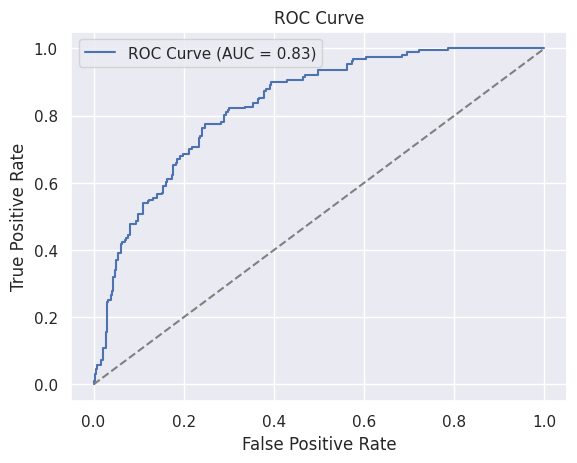

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Tuning the decision Threshold**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict probabilities instead of class labels
y_probs = model.predict_proba(x_test_scaled)[:, 1]  # Probabilities for class 1

# Adjust the threshold
threshold = 0.4  # Lower threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

# ROC-AUC remains the same since it's threshold-independent
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)


Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       363
           1       0.58      0.82      0.68       191

    accuracy                           0.73       554
   macro avg       0.73      0.75      0.73       554
weighted avg       0.78      0.73      0.74       554

Confusion Matrix with Adjusted Threshold:
[[249 114]
 [ 34 157]]
ROC-AUC Score: 0.8303982230683802


**Evaluating Model stability and model perfomance using cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
print("Cross-Validated ROC-AUC Scores:", scores)
print("Mean ROC-AUC Score:", scores.mean())


Cross-Validated ROC-AUC Scores: [0.82829244 0.84285982 0.86412666 0.8446136  0.82414093]
Mean ROC-AUC Score: 0.8408066917842965


**Learning Curve**

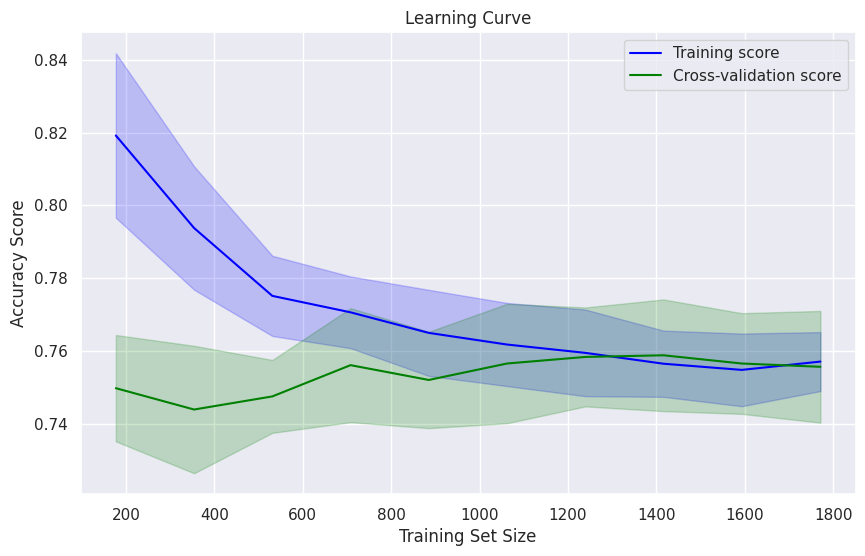

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Define the model (use the trained model logistic regression)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

# Plot the fill between the std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Comparing Models**

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train_scaled, y_train)
rf_y_probs = rf_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate
rf_y_pred = rf_model.predict(x_test_scaled)
print(classification_report(y_test, rf_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_y_probs))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       363
           1       0.98      0.99      0.99       191

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554

ROC-AUC Score: 0.9999423074149394


**XGBClassifier**

In [25]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       0.96      0.95      0.95       187

    accuracy                           0.97       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.97      0.97      0.97       554

Confusion Matrix:
[[359   8]
 [  9 178]]
ROC-AUC Score: 0.9820


**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define your XGBoost model
xgb_model = xgb.XGBClassifier()

# Create a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Step size
    'max_depth': [3, 4, 5, 6],                    # Maximum depth of trees
    'min_child_weight': [1, 2, 3, 4],             # Minimum sum of instance weight (hessian)
    'subsample': [0.7, 0.8, 0.9, 1],             # Fraction of training samples used
    'colsample_bytree': [0.7, 0.8, 0.9, 1],      # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2],                      # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 2, 3, 4],             # Used for imbalanced classes
    'reg_alpha': [0, 0.01, 0.1, 1],              # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5, 1]               # L2 regularization term
}

# Use RandomizedSearchCV to search over the grid
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
random_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters:  {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Best Score:  0.9697380307136405
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
[[364   3]
 [  7 180]]
ROC-AUC Score:  0.9771962289994025


**K-Neighboughrs Classifier**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # the 'n_neighbors' parameter

# Fit the model
knn.fit(x_train, y_train)

# Make predictions
knn_y_pred = knn.predict(x_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])  # ROC-AUC score

# Print results
print("KNN Model Performance:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-Score: {knn_f1:.2f}")
print(f"ROC-AUC Score: {knn_roc_auc:.2f}")

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))


KNN Model Performance:
Accuracy: 0.85
Precision: 0.77
Recall: 0.79
F1-Score: 0.78
ROC-AUC Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       367
           1       0.77      0.79      0.78       187

    accuracy                           0.85       554
   macro avg       0.83      0.83      0.83       554
weighted avg       0.85      0.85      0.85       554

Confusion Matrix:
[[323  44]
 [ 40 147]]


**Improving the K-nearest neighbough by tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],               # Number of neighbors to test
    'weights': ['uniform', 'distance'],           # Weight function for prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'], # Distance metric
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Predict using the best model
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(x_test)

# Evaluate the best KNN model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print classification report
print("Classification Report for Best KNN Model:")
print(classification_report(y_test, y_pred_knn))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_knn)
print(f"ROC-AUC Score: {roc_auc}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9832926468034687
Classification Report for Best KNN Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
[[363   4]
 [  7 180]]
ROC-AUC Score: 0.9758338311792389


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Show the graphs on a barplot**

In [ ]:
# For Logistic Regression
logreg_accuracy = 0.73  # Accuracy
logreg_precision = 0.88  # Precision for Class 0 (Non-diabetic)
logreg_recall = 0.69  # Recall for Class 0 (Non-diabetic)
logreg_f1 = 0.77  # F1-Score for Class 0 (Non-diabetic)


# For Random Forest
rf_accuracy = 0.99  # Accuracy
rf_precision = 1.00  # Precision for Class 0 (Non-diabetic)
rf_recall = 0.99  # Recall for Class 1 (Diabetic)
rf_f1 = 0.99  # F1-Score for Class 1 (Diabetic)

# For XGBoost
xgb_accuracy = 0.98  # Accuracy f
xgb_precision = 0.98  # Precision for Class 0 (Non-diabetic) f
xgb_recall = 0.96  # Recall for Class 1 (Diabetic)
xgb_f1 = 0.97  # F1-Score for Class 1 (Diabetic)

# For K-Nearest Neighbors
knn_accuracy = 0.98  # Accuracy
knn_precision = 0.98  # Precision for Class 0 (Non-diabetic)
knn_recall = 0.96  # Recall for Class 1 (Diabetic)
knn_f1 = 0.97  # F1-Score for Class 1 (Diabetic)


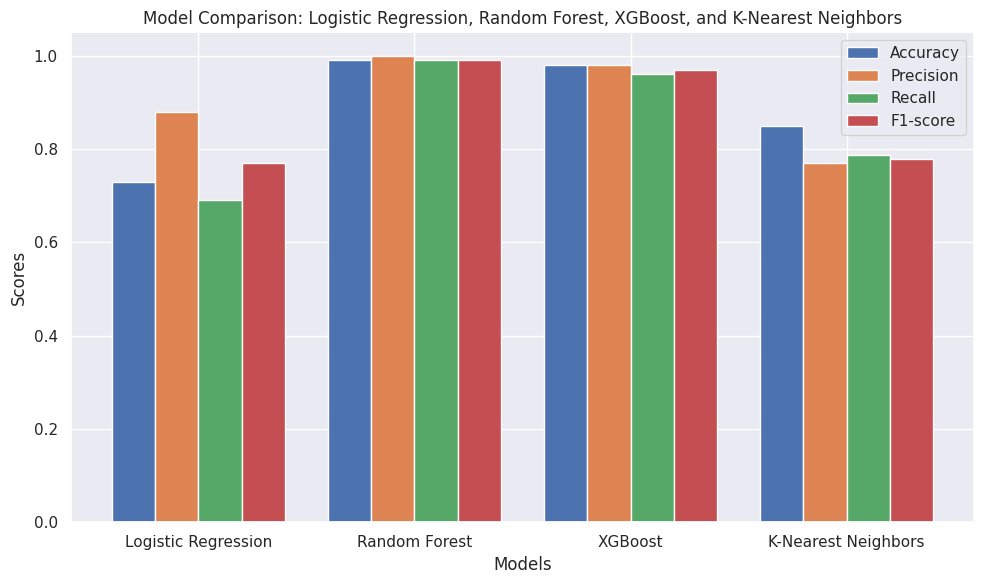

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'K-Nearest Neighbors']
accuracy_scores = [logreg_accuracy, rf_accuracy, xgb_accuracy, knn_accuracy]
precision_scores = [logreg_precision, rf_precision, xgb_precision, knn_precision]
recall_scores = [logreg_recall, rf_recall, xgb_recall, knn_recall]
f1_scores = [logreg_f1, rf_f1, xgb_f1, knn_f1]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions for the bars
bar_width = 0.2
index = np.arange(len(models))

# Create bars for each metric
bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_scores, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1-score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Logistic Regression, Random Forest, XGBoost, and K-Nearest Neighbors')
ax.set_xticks(index + 1.5 * bar_width)  # Position the x-ticks in the center
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Finalizing and saving the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib  # Used for saving the model

# Train the model
final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example, replace with your tuned model
final_rf_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = final_rf_model.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, final_rf_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

# Save the model
joblib.dump(final_rf_model, 'final_rf_model.joblib')

print("Model saved successfully!")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
[[363   4]
 [  7 180]]
ROC-AUC Score: 0.5670124874324265
Model saved successfully!


**Deploying the model**

In [ ]:
# Load the saved model
loaded_rf_model = joblib.load('final_rf_model.joblib')

# Make predictions using the loaded model
y_pred_loaded = loaded_rf_model.predict(x_test)
print("Predictions from the loaded model:", y_pred_loaded)


Predictions from the loaded model: [0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 

**Anaylzing**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Compare the predictions with actual labels (y_test)
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, final_rf_model.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
[[363   4]
 [  7 180]]
ROC-AUC Score: 0.997420915356482


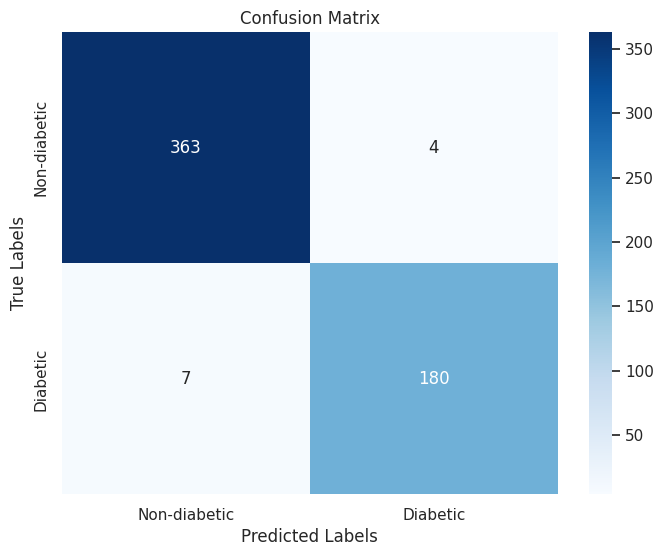

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions using the final model
y_pred = final_rf_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Final evaluation and plotting**

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
[[364   3]
 [  7 180]]
ROC-AUC Score: 0.994564979819027


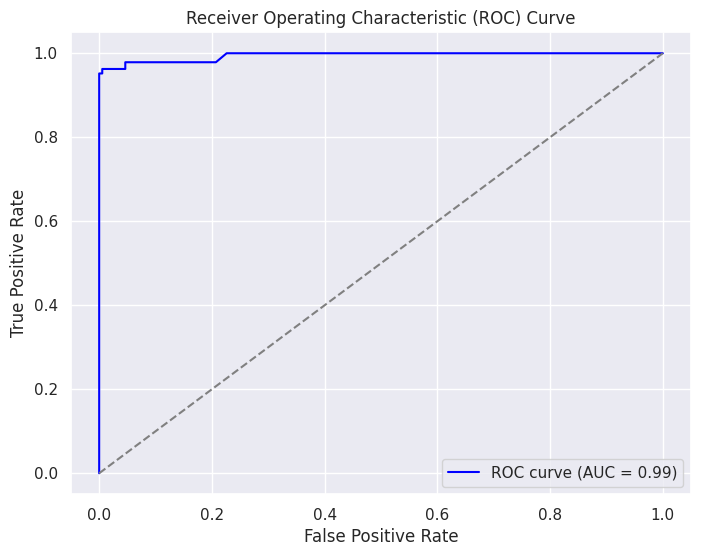

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Split the dataset into features (X) and target (y)
X = df.drop(columns='Outcome')
y = df['Outcome']  # Target (the column to predict)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Define the transformers for each type of feature
numeric_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Creating a preprocessor that applies the transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then applies a classifier for Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(x_train, y_train)

# Evaluating the model on the test set
y_pred = pipeline.predict(x_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_probs = pipeline.predict_proba(x_test)[:, 1]  # Get the probabilities for class 1 (positive class)
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


**Saving the Model**

In [ ]:
import joblib

# Save the model
joblib.dump(final_rf_model, 'final_rf_model.joblib')

print("Model saved successfully!")


Model saved successfully!
